# Random Forest

Ensemble methods combine multiple base estimators in order to produce more robust models that generalizes better for unseen data. *Bagging* and *Boosting* are two main categories of ensemble methods. Their difference you asked? It the way they combine predictions from the underlying estimators

**Bagging method** builds estimators *independently* and then average their predictions.It reduces the variance of the final model by introducing randomness in the way each base estimator is built. It other words, *reduce over-fitting*.

**Boosting method** build base estimators in a *sequence*, where each subsequent estimator learns from the mistakes of its predecessor. Compared to reducing variance(bagging method), it reduces bias of the resulting estimator





### How does it all work??

***Random Forest*** is an example of bagging and *Ada Boost* is an example of boosting methods, with *Decision Trees* as base estimators. For Random Forest, each tree is trained on a **bootstrap sample of the data** with the option to use a **subset of the original input features**. These 2 elements of randomness ensure that each tree will be different. If we assume that each tree over fits part of the data, we expect that their average will reduce this effect.

#### Parameters
* n_estimators: the number of estimators, being the total number of trees built
* max_features: the maximum number of input attributes used to select the split at each node

#### The more trees the better?
In general, the larger the number of estimators, the better the results, but it leads to longer training times. It is also likely that after a certain number of trees, the accuracy will plateau. Use CV to tune these parameters. Once *n_estimators=N* is selected, *$N$* decision trees are built in the way described above and the final prediction is obtained by averaging those predictions. 

Lets build a RF and visualize a single tree!

[source](https://www.kaggle.com/willkoehrsen/visualize-a-decision-tree-w-python-scikit-learn)

In [15]:
from sklearn.datasets import load_iris, load_wine
iris = load_iris()

# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(iris.data, iris.target)
# Extract single tree
estimator = model.estimators_[5]

In [3]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

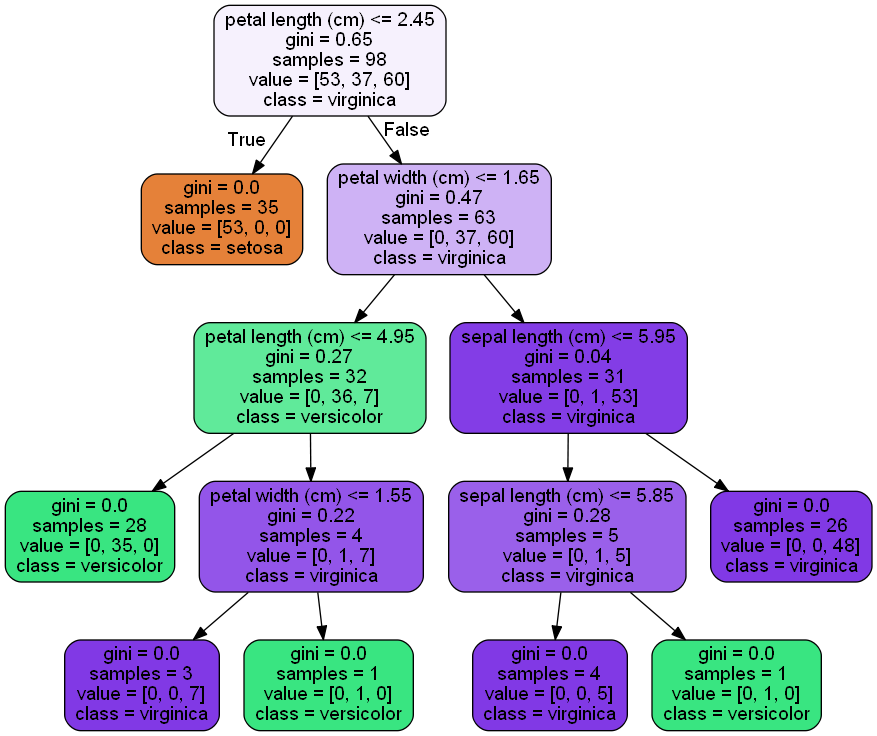

In [9]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
import pydotplus
from IPython.display import Image

dot_data = StringIO()

# Export as dot file
export_graphviz(estimator, out_file=dot_data, 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Ada Boost

The principal of boosting methods is to train a series of 'weak' learners eg decision trees with small depth. In each iteration, trees are built by assigning weights to each instance of the data. At first, given $K$ training samples, each training sample gets assigned weight equal to 1/K. At each iteration, samples that were not correctly classified get higher weights, forcing the model to train better on those cases. At the end, predictions are combined through a weighted majority vote.

#### Parameters
*n_estimator:* equivalent to Randam forest, being the total number of trees built
*base_estimator:* is the model type of the underlying models, the default base estimator is decision stumps (decision trees with max_depth = 1)

In [16]:
from sklearn.ensemble import AdaBoostClassifier


# load dataset
data = load_wine()
# feature matrix
X = data.data
# target vector
y = data.target
# class labels
labels = data.feature_names
estimator = AdaBoostClassifier().fit(X, y)
trees = estimator.estimators_

print("Number of trees " + str(len(trees)))

Number of trees 50


Getting the summary of each estimator

In [17]:
display(estimator.estimators_)

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=736913772, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=902010650, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_lea

We can loop over each element of the list and get the number of nodes per tree.

In [18]:
print("Number of nodes per tree is ")

i_tree = 0
for tree_in_forest in trees:
    print(tree_in_forest.tree_.node_count)
    i_tree += 1

Number of nodes per tree is 
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


Notice how each tree only has 3 nodes? Thats because we use the default setting for base estimator, which is a max depth of 1. Each decision tree have a different split at the top node. Different splits are due to the different weights that each sample gets at each iteration. Each tree focuses on predicting correctly what the previous free failed to classify correctly.